In [103]:
import pandas as pd
data=pd.read_csv("book.csv")

In [104]:
data.head()

,s.no,date,open,high,low,close,doji,fun1,body1,body2,body3,label
0,396,10/19/2017,58.18,58.28,57.06,57.26,0,-0.92,0.10,0.92,0.20,10
1,395,10/20/2017,57.26,57.87,56.63,57.87,0,0.61,0.00,0.61,0.63,10
2,394,10/23/2017,57.98,58.02,57.30,57.30,0,-0.68,0.04,0.68,0.00,10
3,393,10/24/2017,57.30,58.53,57.06,58.51,0,1.21,0.02,1.21,0.24,10
4,392,10/25/2017,58.52,58.71,57.88,58.35,0,-0.17,0.19,0.17,0.47,10


# Data Analysis

In [105]:
data.isnull().sum()

s.no     0
date     0
open     0
high     0
low      0
close    0
doji     0
fun1     0
body1    0
body2    0
body3    0
label    0
dtype: int64

In [106]:
data.describe()

,s.no,open,high,low,close,doji,fun1,body1,body2,body3,label
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,221.149378,68.266701,69.125415,67.440000,68.266680,0.178423,-0.000021,0.428880,0.857573,0.401203,9.039419
std,126.956876,6.811666,6.759913,6.836006,6.809007,0.383266,1.159005,0.381795,0.776589,0.358358,2.295368
min,1.000000,50.880000,54.420000,50.290000,50.780000,0.000000,-4.750000,0.000000,0.000000,-0.270000,1.000000
25%,111.250000,62.682500,63.690000,62.072500,62.685000,0.000000,-0.617500,0.160000,0.302500,0.120000,10.000000
50%,219.500000,67.510000,68.100000,66.735000,67.505000,0.000000,0.110000,0.330000,0.660000,0.340000,10.000000
75%,330.750000,73.585000,74.552500,72.675000,73.585000,0.000000,0.677500,0.590000,1.180000,0.580000,10.000000
max,439.000000,86.000000,86.710000,84.350000,86.000000,1.000000,4.370000,2.380000,4.750000,2.340000,10.000000


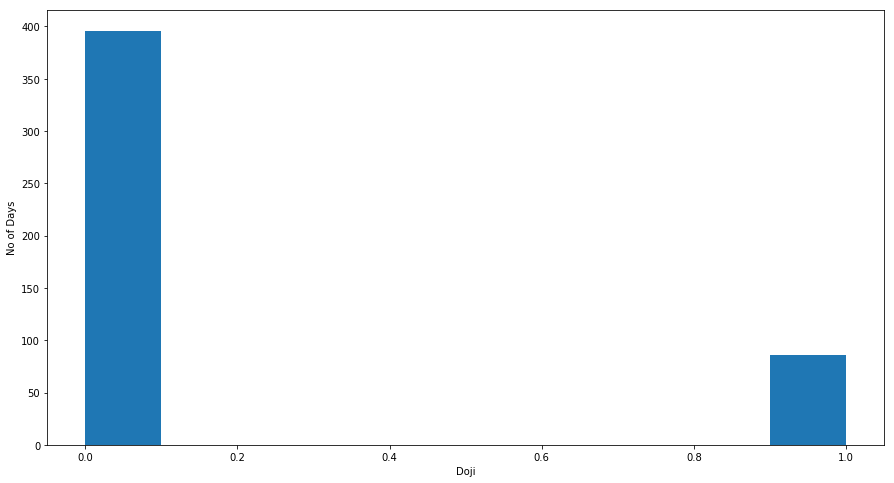

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.hist(data.doji.dropna())
plt.xlabel("Doji")
plt.ylabel("No of Days")
plt.show()

In [108]:
import seaborn as sns

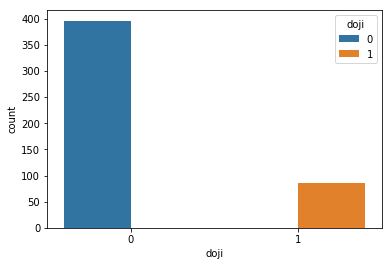

In [109]:
sns.countplot(x="doji",hue="doji",data=data)
plt.show()

In [110]:
output_data=data['doji']

In [111]:
training_data=data[['open','high','close','low','fun1','body1','body2','body3']]

# Splitting into training and testing

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X,x_test,Y,y_test=train_test_split(training_data,output_data,test_size=0.10,random_state=42)

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
decision_model=DecisionTreeClassifier()

In [55]:
decision_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
p=decision_model.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [58]:
x_test.head()

,open,high,close,low,fun1,body1,body2,body3
416,61.68,62.82,60.79,60.61,-0.89,1.14,0.89,0.18
472,59.75,60.29,60.07,58.92,0.32,0.22,0.32,0.83
181,77.80,78.25,78.15,77.64,0.35,0.10,0.35,0.16
444,66.57,67.63,66.69,66.41,0.12,0.94,0.12,0.16
297,60.48,61.40,60.21,60.02,-0.27,0.91,0.27,0.19


In [59]:
y_test.head()

416    0
472    1
181    0
444    1
297    1
Name: doji, dtype: int64

# Check with random values

In [82]:
p=pd.DataFrame([[61.68,62.82,60.79,60.61,-0.89,1.14,0.89,0.18]])

In [83]:
p

,0,1,2,3,4,5,6,7
0,61.68,62.82,60.79,60.61,-0.89,1.14,0.89,0.18


In [81]:
y_pre=decision_model.predict(x_test)

In [69]:
y_pre

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1], dtype=int64)

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [72]:
rmse=sqrt(mean_squared_error(y_pre,y_test))
rmse

0.3779644730092272

In [78]:
pd.crosstab(y_test, y_pre)

col_0,0,1
doji,,
0,34,3
1,4,8


### Our Accuracy is 85.71%

# Support Vector Machines

In [73]:
from sklearn import svm, datasets

In [74]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [75]:
#Train the model using the training sets
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [76]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [77]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [100]:
rmse=sqrt(mean_squared_error(y_pred,y_test))
rmse

0.31943828249996997

In [99]:
pd.crosstab(y_test, y_pred)

col_0,0,1
doji,,
0,37,0
1,5,7


### Our Accuracy is 89.79%

# KNN Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
model=KNeighborsClassifier(n_neighbors=5)

In [96]:
model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [97]:
predicte=model.predict(x_test)

In [102]:
rmse=sqrt(mean_squared_error(predicte,y_test))
rmse

0.47380354147934284

In [98]:
pd.crosstab(y_test, predicte)

col_0,0,1
doji,,
0,36,1
1,10,2


### Our Accuracy is 77.55%